In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import trange

# References:
# Reinforcement Learning: An Introduction
# https://github.com/habanoz/reinforcement-learning-an-introduction
# https://github.com/LyWangPX/Reinforcement-Learning-2nd-Edition-by-Sutton-Exercise-Solutions/tree/master

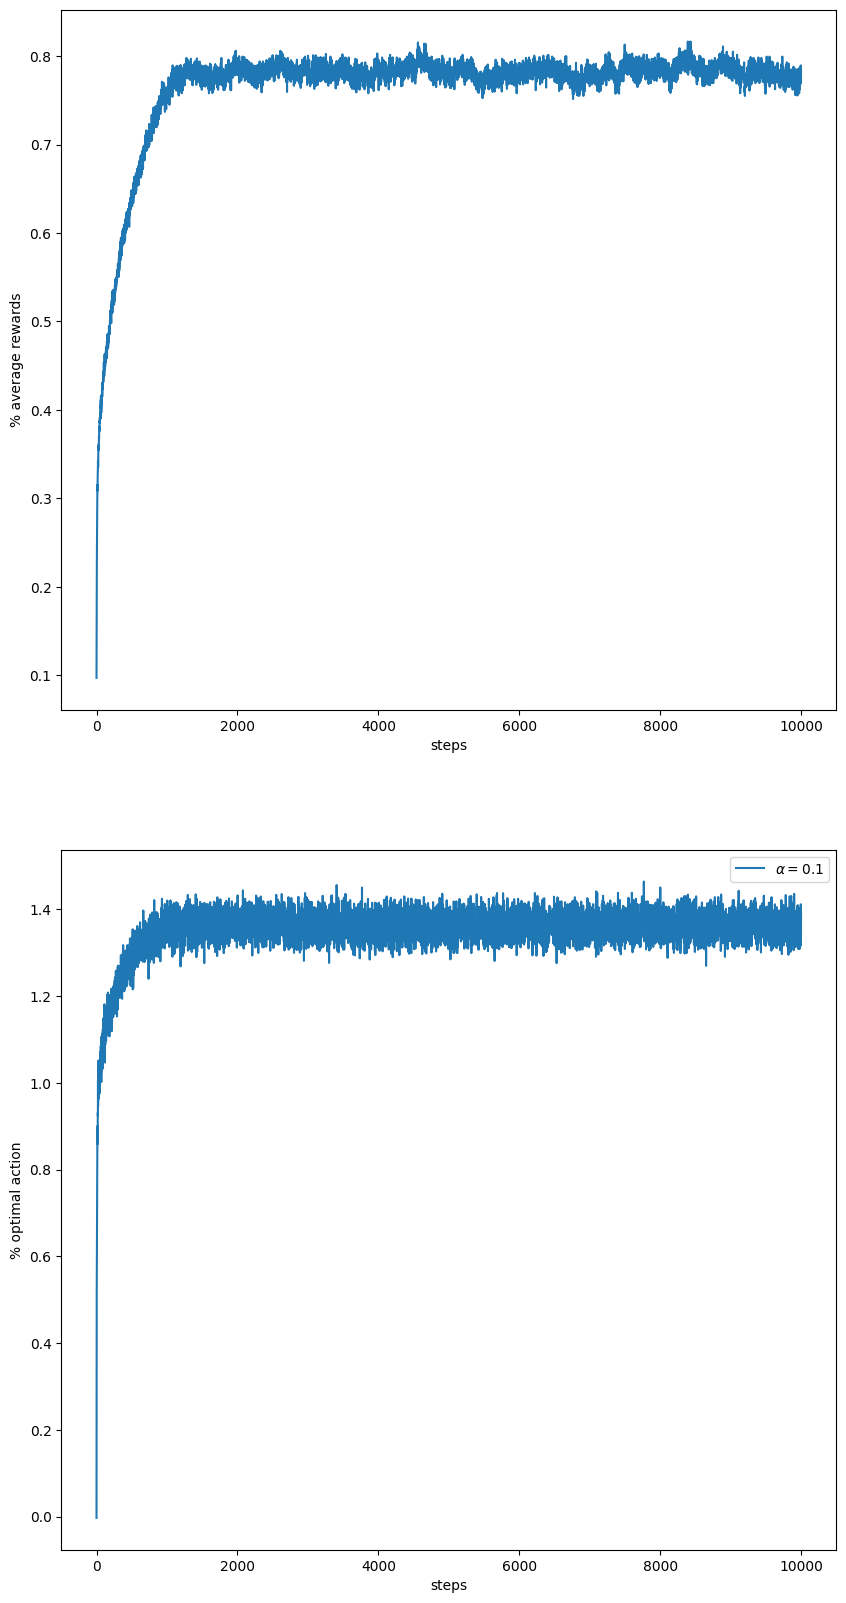

In [29]:
num_bandits = 10
num_runs = 2000
num_iterations = 10000
epsilon = 0.1
step_size = 0.1
choices = np.arange(num_bandits)
rewards_collected = np.zeros((num_runs, num_iterations))
best_action_counts = np.zeros(rewards_collected.shape)
for i in range(num_runs):
    initial_weight = 0
    true_reward = 0
    estimates = np.zeros(num_bandits) + initial_weight
    rewards = np.random.randn(num_bandits) + true_reward
    for j in range(num_iterations):
        if np.random.rand() < epsilon:
            chosen_action = np.random.choice(choices)
        else:
            best_estimation = np.max(estimates)
            chosen_action = np.random.choice(np.where(estimates == best_estimation)[0])
        #print(chosen_action, best_estimation)
        # Get the reward
        reward = np.random.randn() + rewards[chosen_action]
        # update the estimates for next iteration
        estimates[chosen_action] += step_size * (reward - estimates[chosen_action])
        rewards_collected[i, j] = reward
        best_action = np.argmax(rewards)
        if chosen_action == best_action:
            best_action_counts[i, j] = 1

mean_best_actions = best_action_counts.mean(axis=0)
mean_rewards = rewards_collected.mean(axis=0)

plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
plt.plot(mean_best_actions, label=f"$\\alpha = {epsilon}$")
plt.xlabel('steps')
plt.ylabel('% average rewards')

plt.subplot(2, 1, 2)
plt.plot(mean_rewards, label=f"$\\alpha = {epsilon}$")
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

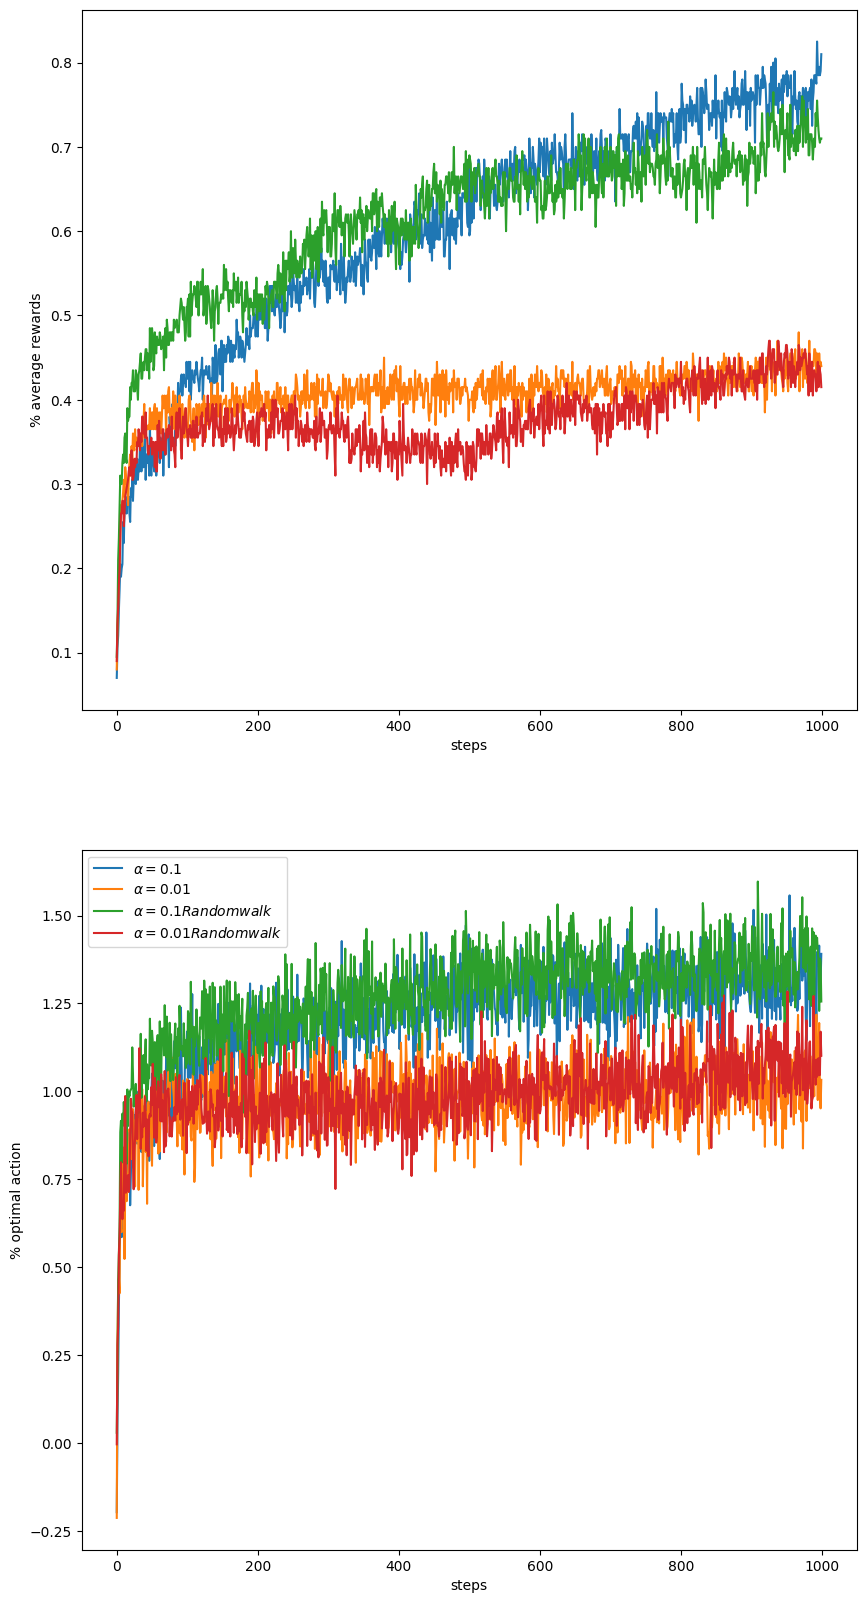

In [45]:
def kbandit(num_bandits, num_runs, num_iterations, epsilon, step_size, random_walk=False):
    choices = np.arange(num_bandits)
    rewards_collected = np.zeros((num_runs, num_iterations))
    best_action_counts = np.zeros(rewards_collected.shape)
    for i in range(num_runs):
        initial_weight = 0
        true_reward = 0
        estimates = np.zeros(num_bandits) + initial_weight
        rewards = np.random.randn(num_bandits) + true_reward
        # rewards are stationary.
        for j in range(num_iterations):
            if np.random.rand() < epsilon:
                chosen_action = np.random.choice(choices)
            else:
                best_estimation = np.max(estimates)
                chosen_action = np.random.choice(np.where(estimates == best_estimation)[0])
            reward = np.random.randn() + rewards[chosen_action]
            
            rewards_collected[i, j] = reward
            best_action = np.argmax(rewards)
            if chosen_action == best_action:
                best_action_counts[i, j] = 1
            # update the estimates for next iteration
            estimates[chosen_action] += step_size * (reward - estimates[chosen_action])

            #non stationary rewards: rewards are updated with a small random value
            # from a normal distribution with mean 0 and standard deviation 0.01
            if random_walk:
                rewards = np.add(rewards, np.random.normal(0, 0.01, num_bandits))
    mean_best_actions = best_action_counts.mean(axis=0)
    mean_rewards = rewards_collected.mean(axis=0)
    return mean_best_actions, mean_rewards

def mutliple_exp(params):
    results = []
    for param in params:
        best_actions, rewards = kbandit(param[1], param[2], param[3], param[4], param[5], param[6])
        label = param[0]
        results.append((best_actions, rewards, label))
    return results

experiments = []
experiments.append(('$\\alpha = 0.1$', 10, 200, 1000, 0.1, 0.1, False))
experiments.append(('$\\alpha = 0.01$', 10, 200, 1000, 0.1, 0.01, False))
experiments.append(('$\\alpha = 0.1 Random walk$', 10, 200, 1000, 0.1, 0.1, True))
experiments.append(('$\\alpha = 0.01 Random walk$', 10, 200, 1000, 0.1, 0.01, True))


results = mutliple_exp(experiments)

plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
for result in results:
    plt.plot(result[0], label=result[2])
plt.xlabel('steps')
plt.ylabel('% average rewards')

plt.subplot(2, 1, 2)
for result in results:
    plt.plot(result[1], label=result[2])
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()